In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_22=pd.read_csv(f'Watermelon_Price_2022.csv')
data_21=pd.read_csv(f'Watermelon_Price_2021.csv')
data_19=pd.read_csv(f'Watermelon_Price_2019.csv')
data_18=pd.read_csv(f'Watermelon_Price_2018.csv')
data_list=[data_22,data_21,data_19,data_18]

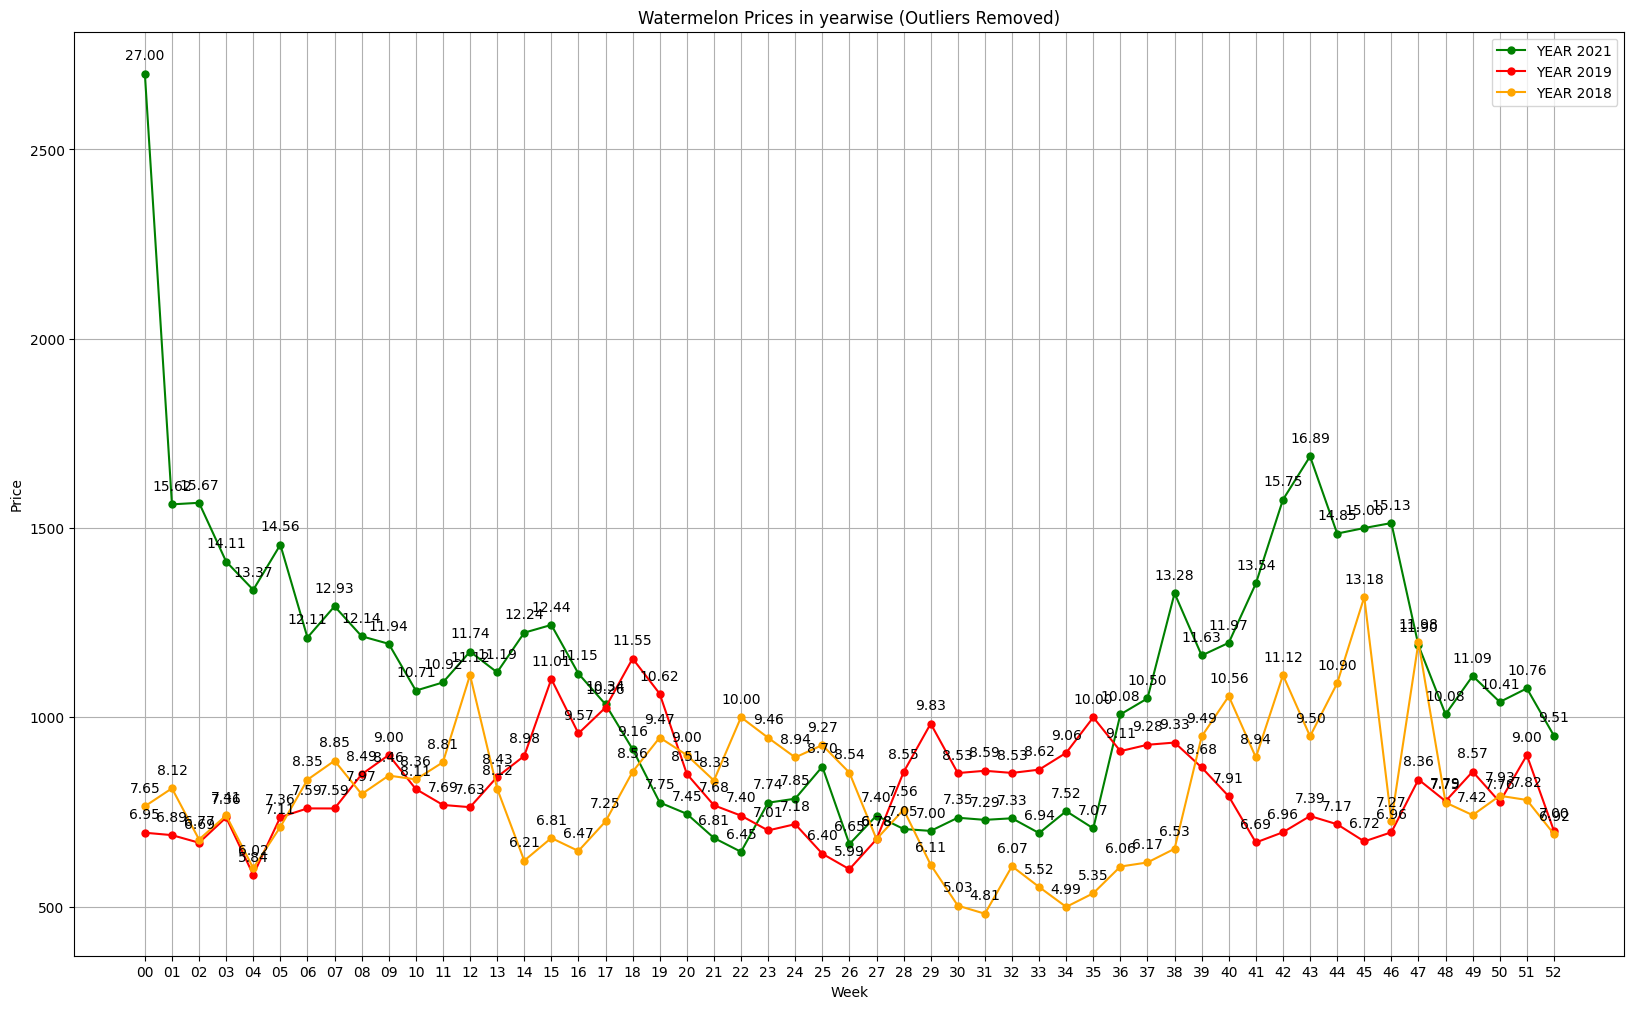

In [3]:
data_grouped1=[]
for x in data_list:
  try:
    x['date_arrival'] = pd.to_datetime(x['date_arrival'])
  except:
    print("Error")
  x['date_arrival'] = pd.to_datetime(x['date_arrival'], format='%d-%b-%Y')
  x = x.drop(['district_name', 'market_center_name', 'Variety', 'group_name'], axis=1)

  x['week'] = x['date_arrival'].dt.strftime('%U')
  x_grouped = x.groupby(['week']).agg({
      'Arrival': 'sum',
      'MIN': 'mean',
      'MAX': 'mean',
      'MODAL': 'mean'
  }).reset_index()
  data_grouped1.append(x_grouped)
  price_list=['MIN','MAX','MODAL']
  for y in price_list:
    Q1 = x_grouped[y].quantile(0.25)
    Q3 = x_grouped[y].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x_grouped = x_grouped[(x_grouped[y] >= lower_bound) & (x_grouped[y] <= upper_bound)]

data_grouped_22=data_grouped1[0]
data_grouped_21=data_grouped1[1]
data_grouped_19=data_grouped1[2]
data_grouped_18=data_grouped1[3]
plt.figure(figsize=(20, 12))
#plt.plot(data_grouped_22['week'], data_grouped_22['MODAL'], label='YEAR 2022', marker='o', color='blue', linestyle='-', markersize=5)
plt.plot(data_grouped_21['week'], data_grouped_21['MODAL'], label='YEAR 2021', marker='o', color='green', linestyle='-', markersize=5)
plt.plot(data_grouped_19['week'], data_grouped_19['MODAL'], label='YEAR 2019', marker='o', color='red', linestyle='-', markersize=5)
plt.plot(data_grouped_18['week'], data_grouped_18['MODAL'], label='YEAR 2018', marker='o', color='orange', linestyle='-', markersize=5)
plt.xlabel('Week')
plt.ylabel('Price')
plt.title('Watermelon Prices in yearwise (Outliers Removed)')
plt.legend()
plt.grid(True)
# for i, row in data_grouped_22.iterrows():
#   plt.annotate(f'{row["MODAL"]/100:.2f}', (row['week'], row['MODAL']), textcoords="offset points", xytext=(0,10), ha='center')
for i, row in data_grouped_21.iterrows():
  plt.annotate(f'{row["MODAL"]/100:.2f}', (row['week'], row['MODAL']), textcoords="offset points", xytext=(0,10), ha='center')
for i, row in data_grouped_19.iterrows():
  plt.annotate(f'{row["MODAL"]/100:.2f}', (row['week'], row['MODAL']), textcoords="offset points", xytext=(0,10), ha='center')
for i, row in data_grouped_18.iterrows():
  plt.annotate(f'{row["MODAL"]/100:.2f}', (row['week'], row['MODAL']), textcoords="offset points", xytext=(0,10), ha='center')


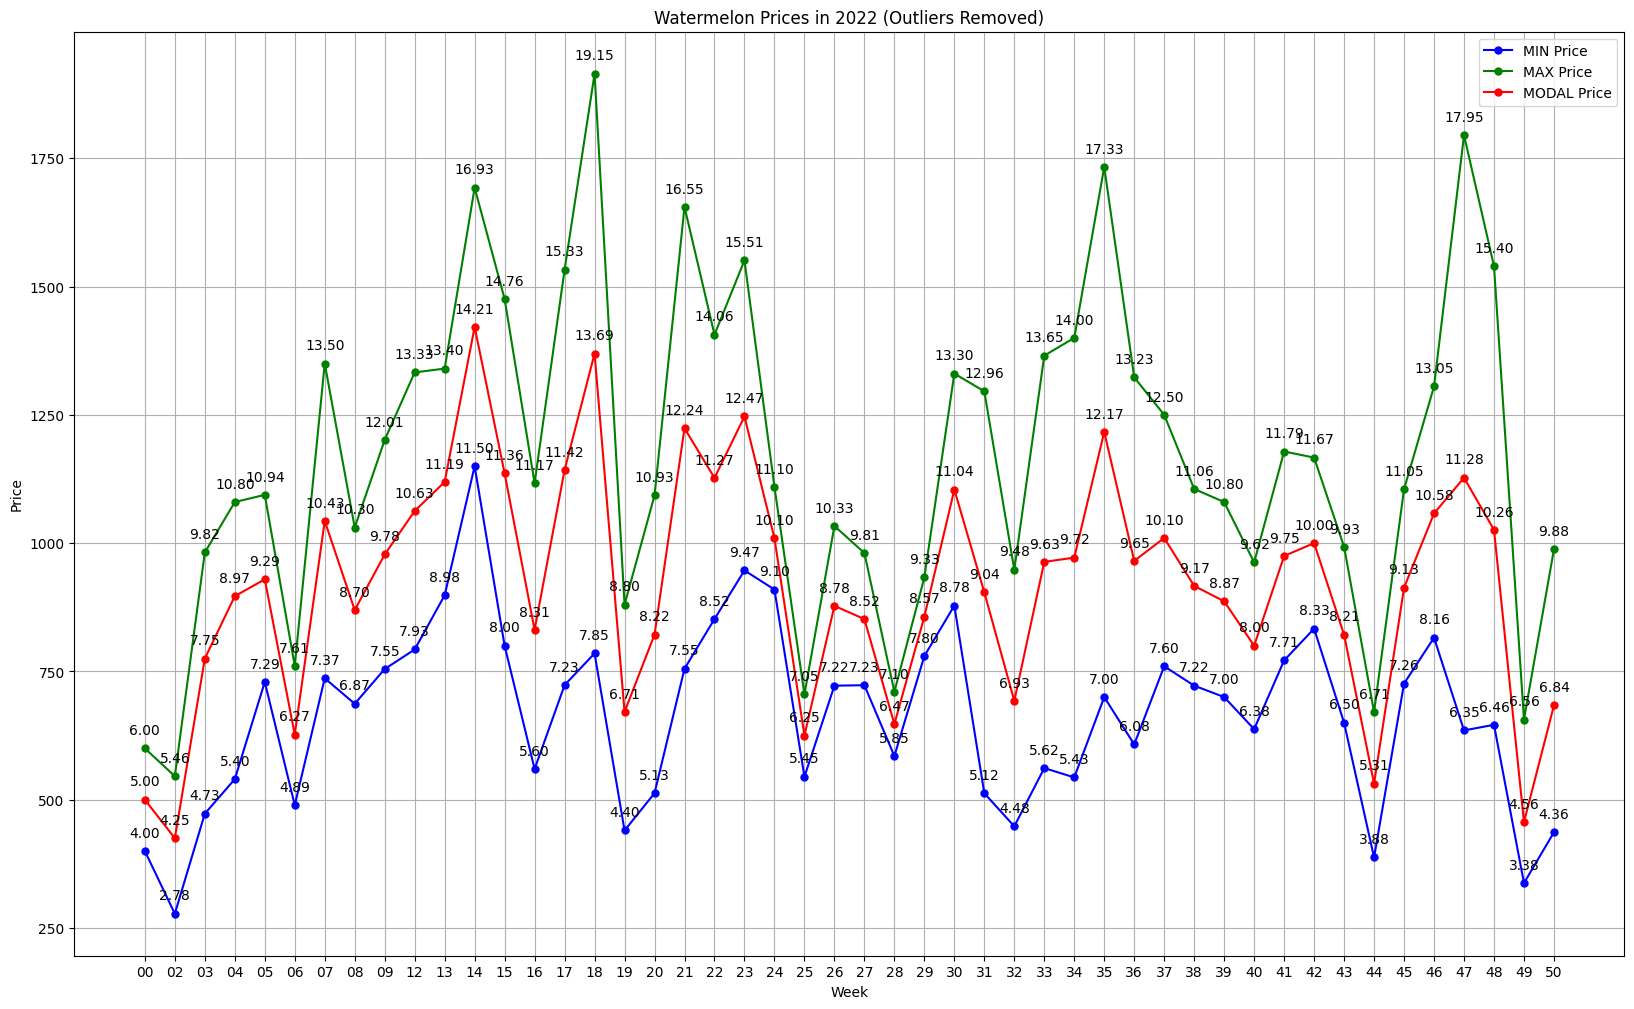

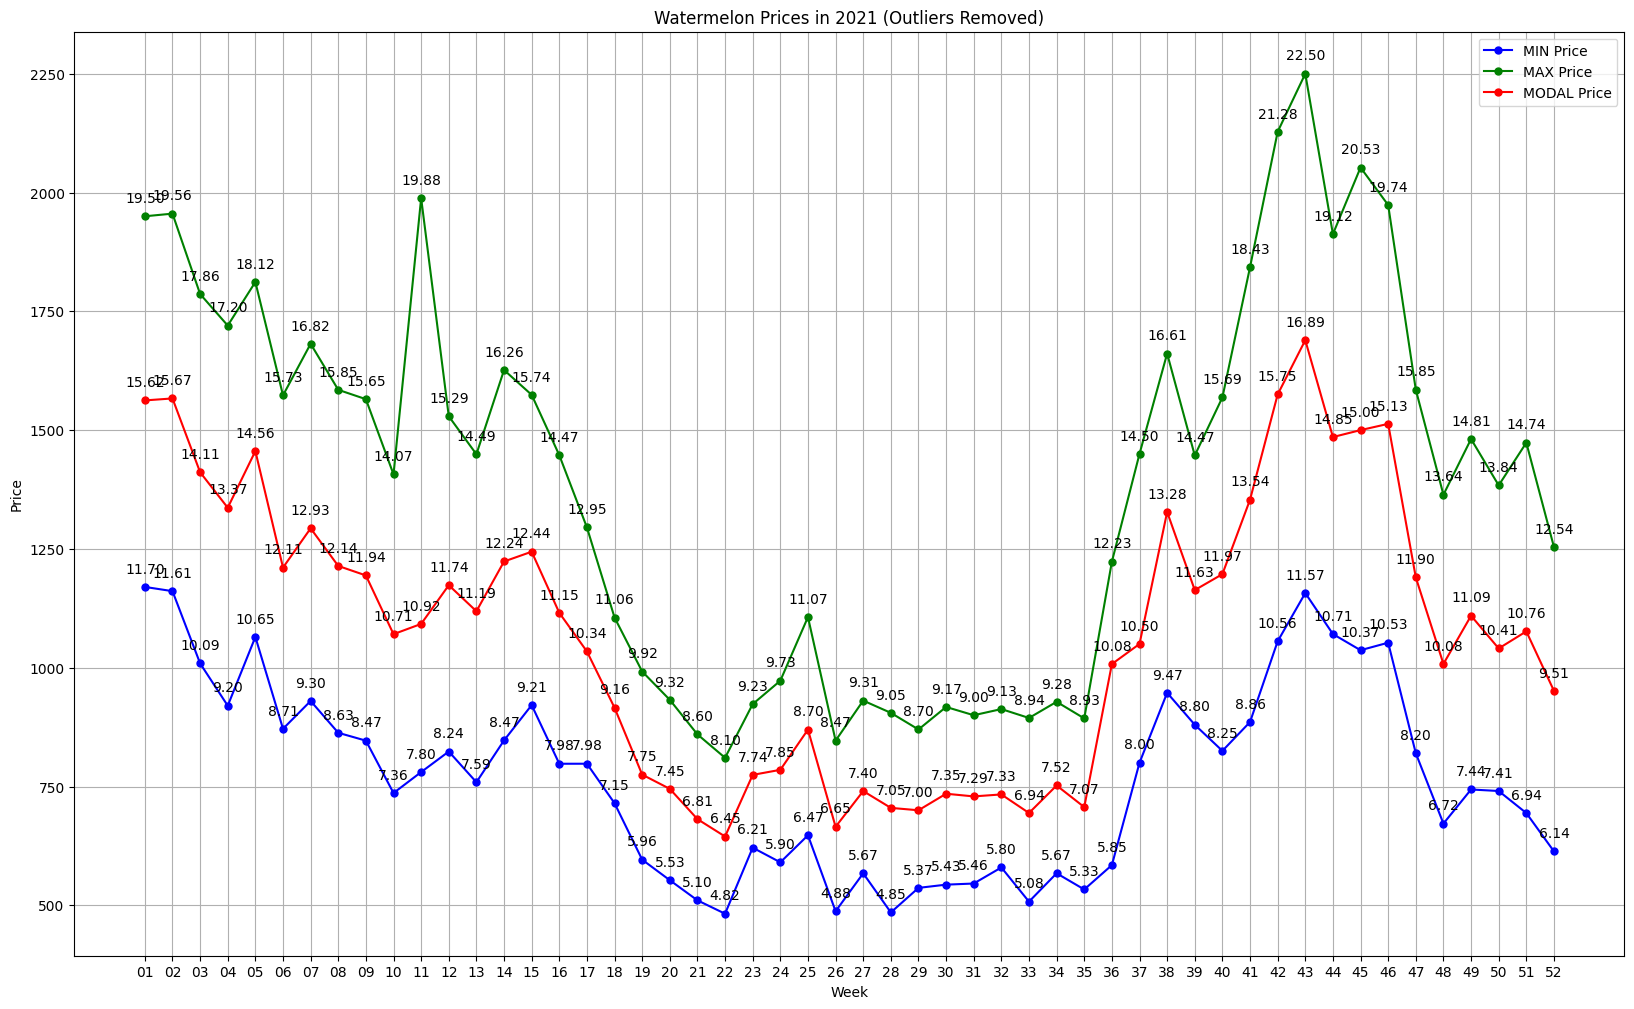

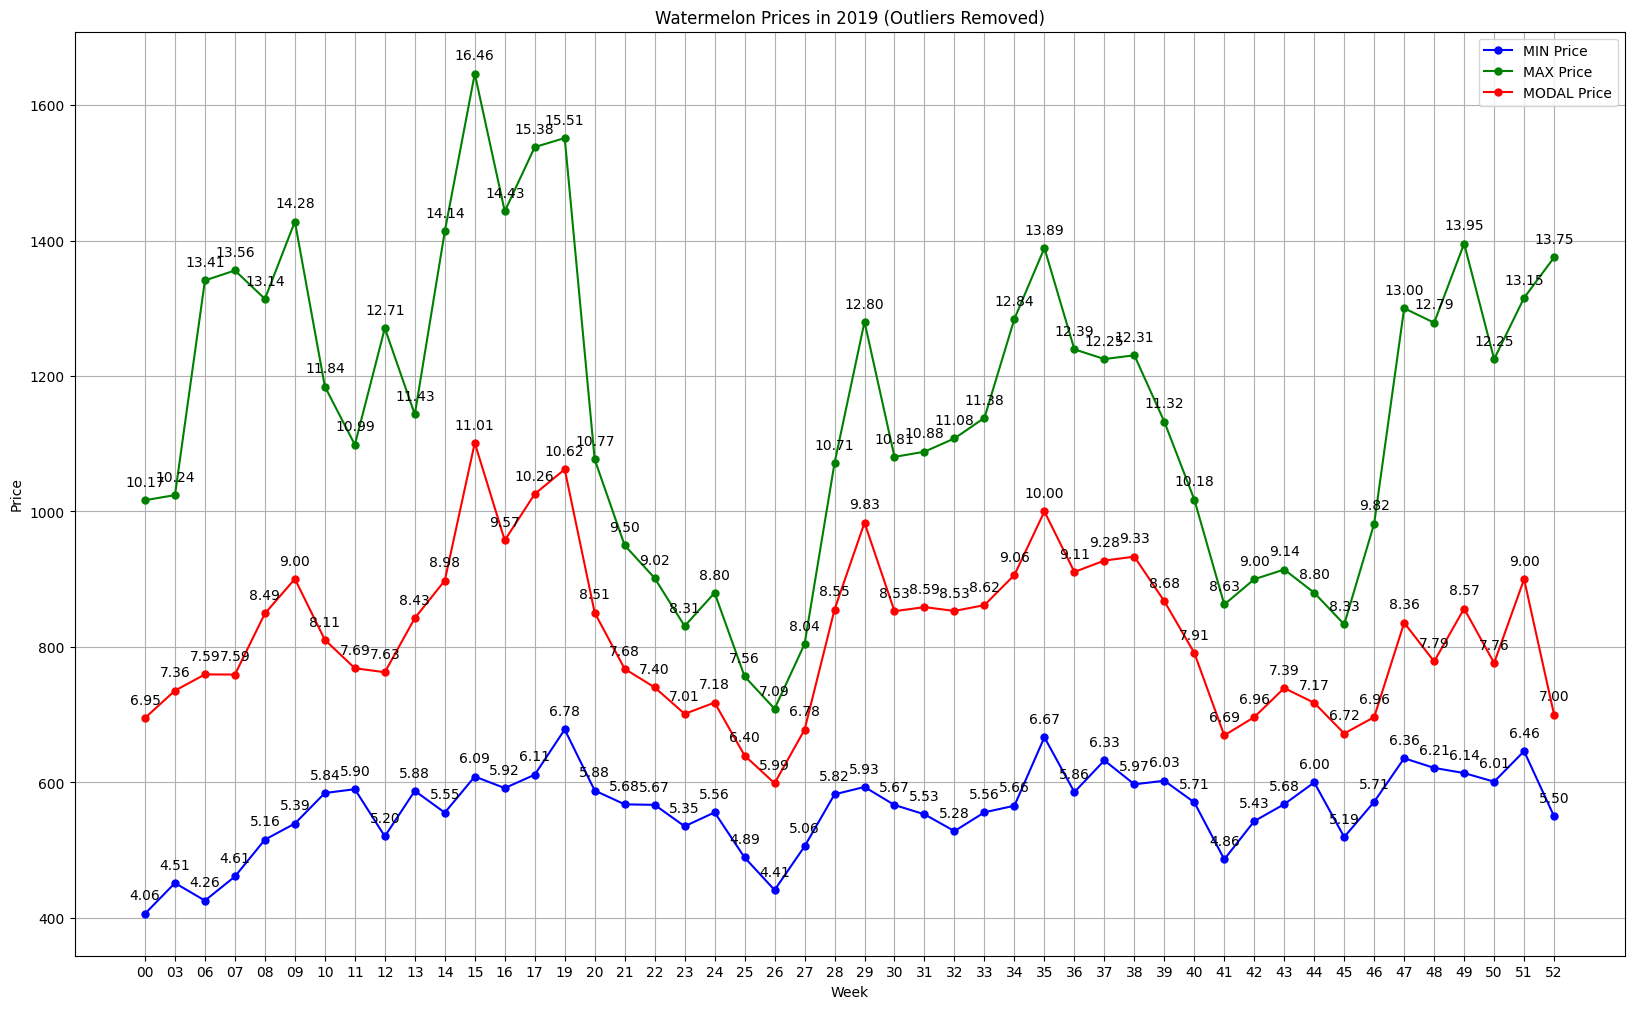

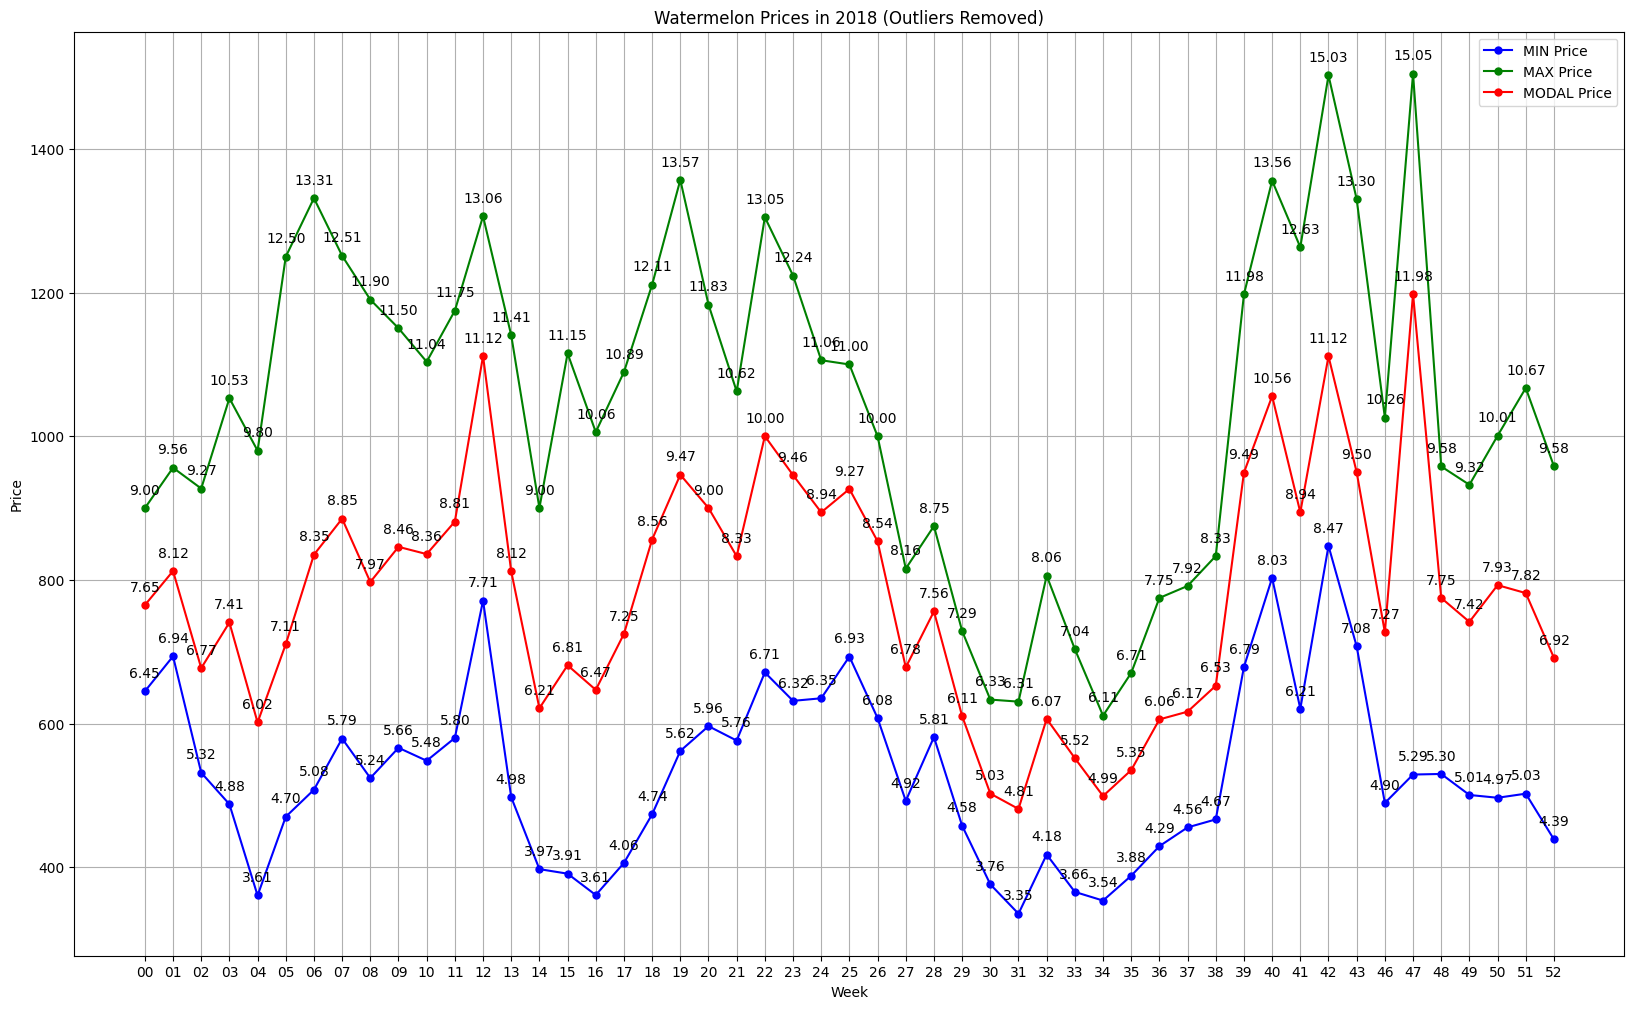

In [4]:
df_list=[2022,2021,2019,2018]
for year in df_list:

  data = pd.read_csv(f'Watermelon_Price_{year}.csv')
  try:
    data['date_arrival'] = pd.to_datetime(data['date_arrival'])
  except:
    print("Error")
  data['date_arrival'] = pd.to_datetime(data['date_arrival'], format='%d-%b-%Y')
  data = data.drop(['district_name', 'market_center_name', 'Variety', 'group_name'], axis=1)

# Grouping by week and aggregate data
  data['week'] = data['date_arrival'].dt.strftime('%U')
  data_grouped = data.groupby(['week']).agg({
      'Arrival': 'sum',
      'MIN': 'mean',
      'MAX': 'mean',
      'MODAL': 'mean'
  }).reset_index()
  q_list=['MIN','MAX','MODAL']
  for x in q_list:
# outlier handling
    Q1 = data_grouped[x].quantile(0.25)
    Q3 = data_grouped[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_grouped = data_grouped[(data_grouped[x] >= lower_bound) & (data_grouped[x] <= upper_bound)]

  plt.figure(figsize=(20, 12))
  plt.plot(data_grouped['week'], data_grouped['MIN'], label='MIN Price', marker='o', color='blue', linestyle='-', markersize=5)
  plt.plot(data_grouped['week'], data_grouped['MAX'], label='MAX Price', marker='o', color='green', linestyle='-', markersize=5)
  plt.plot(data_grouped['week'], data_grouped['MODAL'], label='MODAL Price', marker='o', color='red', linestyle='-', markersize=5)

  plt.xlabel('Week')
  plt.ylabel('Price')
  plt.title('Watermelon Prices in '+str(year)+' (Outliers Removed)')
  plt.legend()
  plt.grid(True)
  for i, row in data_grouped.iterrows():
      plt.annotate(f'{row["MIN"]/100:.2f}', (row['week'], row['MIN']), textcoords="offset points", xytext=(0,10), ha='center')
      plt.annotate(f'{row["MAX"]/100:.2f}', (row['week'], row['MAX']), textcoords="offset points", xytext=(0,10), ha='center')
      plt.annotate(f'{row["MODAL"]/100:.2f}', (row['week'], row['MODAL']), textcoords="offset points", xytext=(0,10), ha='center')

  plt.show()
